In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import random

In [16]:
X, y = make_blobs(1000, centers=10, random_state=42, n_features=100)

In [17]:
class KMeans:
    
    def __init__(self, n_clusters, iters=10):
        self.n_clusters = n_clusters
        self.iters = iters
        
    def fit(self, X):
        self.X = X
        
        errors = []
        
        # create k seed points
        points = random.choices(list(X), k=self.n_clusters)
        
        # create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
            
        for _ in range(self.iters):
            
            self.labels_ = []
            
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
                
            for cluster in self.clusters:
                cluster.update_center()
                
            errors.append(self.error())
        
        return errors
                
    
    def error(self):
        total = 0
        for point, label in zip(self.X, self.labels_):
            dis = self.clusters[label].distance(point)
            total += dis
        return total
        

    
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center - point) ** 2)

    def __repr__(self):
        return str(self.center)
        

In [18]:
model = KMeans(10)

In [19]:
errors = model.fit(X)

In [20]:
# plt.scatter(X[:, 0], X[:, 1], s=6, c=model.labels_)
# for i, cluster in enumerate(model.clusters):
#     plt.scatter(cluster.center[0], cluster.center[1], s=60)

In [21]:
model.clusters

[[-7.89570708  7.86050052  0.10714289  6.72812912 -3.80369948  7.75304539
  -2.1978297  -9.66598027  7.99406337 -8.15588498 -3.56119769  8.91872805
   8.98281994  1.52413391  2.80544598 -1.09706321 -4.02878318 -3.47886597
   3.66245146  4.92540444  5.95525921  5.76388859 -8.04150063 -0.06454561
  -8.77657279  0.96683478 -1.23758383  7.73098695 -2.82199744 -7.68222325
  -7.16779568  5.25732787  2.32873783 -7.9612413  -8.30997198  4.09522848
  -8.64827179  6.46286658  4.08711301 -8.47707462 -8.21701557  9.66176091
  -2.37264137 -2.5363508   6.16426816  8.87202835  9.77718959  4.89475995
  -2.46758878 -8.27153335  5.38873887  1.05200974 -1.54274529  8.09861722
  -7.67272555 -0.04917222 -9.69240988 -0.63570312 -8.77428416 -7.64152936
  -7.58356825  2.92577296  5.040951    1.60462307  9.2389038  -2.35927909
  -4.25929697  7.48597343 -5.43477158  9.34102321 -9.68363203  9.43557882
  -9.20404788  7.9968815   0.53358163 10.04863246 -8.42841383  0.8848032
   9.49001038  0.56375241  2.57691581  

In [22]:
errors

[1374480.0440301334,
 730192.8349350649,
 730175.7800651708,
 730163.4064372692,
 730143.1903284962,
 730134.610198956,
 730126.3181046406,
 730120.8029449857,
 730116.4191802545,
 730116.4191802545]

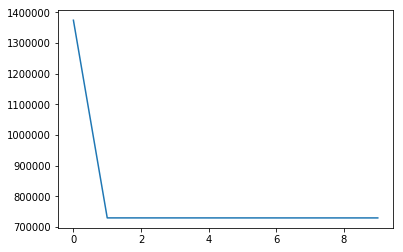

In [23]:
plt.plot(errors)